# Oil Production Tonnes

Projeto final da disciplina **Forecasting**

**Aluna:** Fernanda de Queiroz Souza

*Fonte: https://github.com/Eraylson/series_temporais*

## Bibliotecas

In [ ]:
#!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pmdarima as pm
from pmdarima import auto_arima

import os

import datetime
from datetime import datetime, date, time, timedelta

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

In [2]:
import  warnings 
warnings.simplefilter('ignore')

In [3]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

## Leitura dos dados

In [4]:
original_path = os.getcwd()
original_path

'C:\\Users\\Fernanda.Souza\\OneDrive - Unilever\\Documents\\Jupyter\\MBA\\MBA_Forecasting'

In [5]:
os.chdir('C:/Users/Fernanda.Souza/OneDrive - Unilever/Documents/Jupyter/MBA/MBA_Forecasting/ProjetoFinal')

In [6]:
df = pd.read_excel('oil-production-tonnes.xls')

## Análise dos dados

In [7]:
df

,Year,Million Tones
0,1965-01-01,5.033297
1,1966-01-01,6.147396
2,1967-01-01,7.738966
3,1968-01-01,8.504936
4,1969-01-01,9.277483
5,1970-01-01,8.800012
6,1971-01-01,9.202844
7,1972-01-01,9.015267
8,1973-01-01,9.149792
9,1974-01-01,9.521158


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           49 non-null     datetime64[ns]
 1   Million Tones  49 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 912.0 bytes


In [9]:
# Renomeando as colunas para serem mais intuitivas
df = df.rename(columns = {'Year': 'ano', 
                          'Million Tones': 'milhoes_tons', 
                         })

In [10]:
#Considerando apenas os anos da coluna de data
df['ano'] = df['ano'].astype(str)
df['ano'] = df['ano'].str[0:4]
df

,ano,milhoes_tons
0,1965,5.033297
1,1966,6.147396
2,1967,7.738966
3,1968,8.504936
4,1969,9.277483
5,1970,8.800012
6,1971,9.202844
7,1972,9.015267
8,1973,9.149792
9,1974,9.521158


In [11]:
#Definindo a coluna como inteiro
df['ano'] = df['ano'].astype(int)

In [12]:
#Transformando a coluna "ano" em index para facilitar as avaliações posteriores da série 
df = df.set_index('ano')
df.head()

,milhoes_tons
ano,
1965,5.033297
1966,6.147396
1967,7.738966
1968,8.504936
1969,9.277483


In [13]:
df.tail()

,milhoes_tons
ano,
2009,105.606944
2010,111.377764
2011,114.212252
2012,112.186778
2013,109.940770


Menor valor do indice = 1965 (posição 0)

Maior valor do indice = 2013 (posição 48)

In [14]:
# Conferindo se realmente não tem nenhum dado faltante na série
print(f'Valores faltantes: {df.isnull().values.any()}!')

Valores faltantes: False!


A série possui uma coluna correspondente ao ano de produção, que foi transformada em index para facilitar as avaliações da série que serão feitas nas sessões seguintes, e uma coluna correspondente a produção em milhões de toneladas de oléo. Possui 49 linhas, ou seja, 49 entradas de dados com nenhum dado faltante. 

## Análise da série

**Avaliação dos números**

In [15]:
df.describe()

,milhoes_tons
count,49.000000
mean,42.369504
std,35.975151
min,5.033297
25%,9.277483
50%,32.152651
75%,70.033871
max,114.212252


**Plotagem da série**

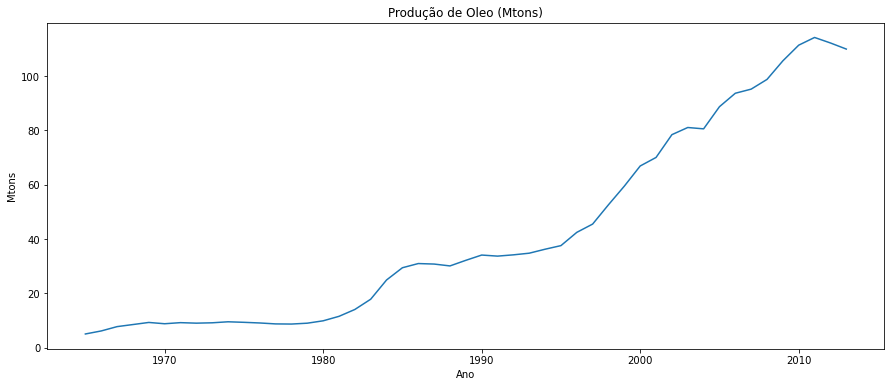

In [16]:
plt.title('Produção de Oleo (Mtons)')
plt.xlabel("Ano")
plt.ylabel("Mtons")
plt.plot(df['milhoes_tons'])

**Decomposição da tendencia, sazonalidade e resíduo da série**

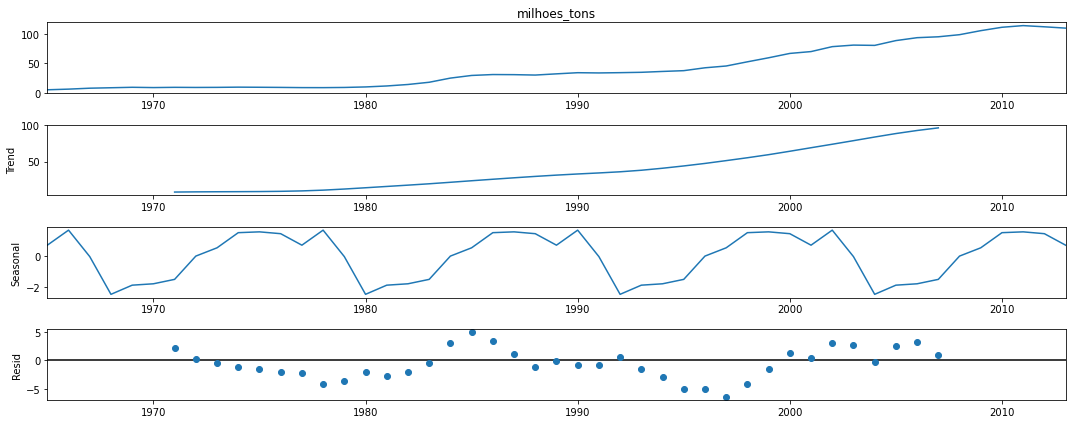

In [17]:
df_decomp = tsa.seasonal_decompose(df['milhoes_tons'], period=12)
df_decomp.plot();

Podemos observar:
1. Tendencia positiva (crescente)
2. A série não possue sazonalidade significativa, pois o gráfico está variando em torno de zero
3. O resíduo possue características de ruído branco (desvio padrão pequeno e variando em torno de zero)

**Média e desvio padrão da série**

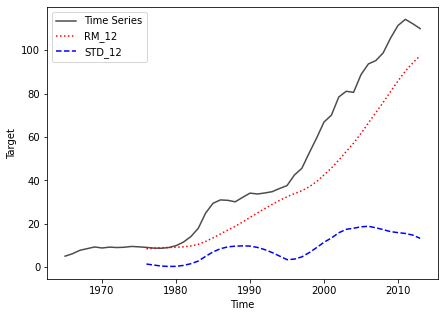

In [18]:
rolmean12 = df.rolling(window = 12).mean()
rolstd12 = df.rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df, color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

**Função de Autocorrelação (FAC) e Função de Autocorrelação Parcial (FACP)**

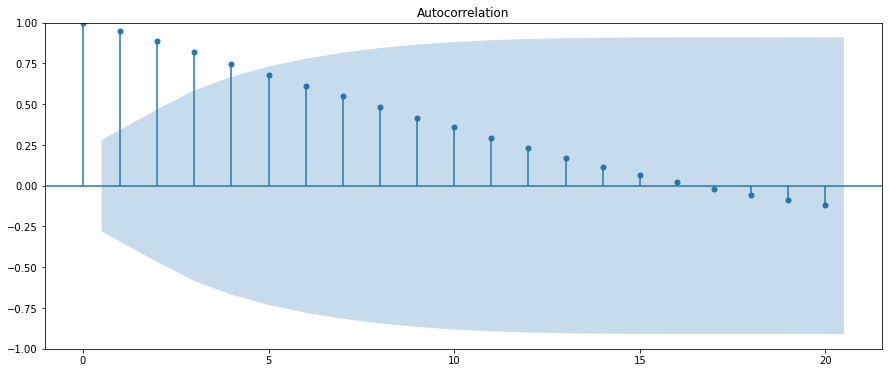

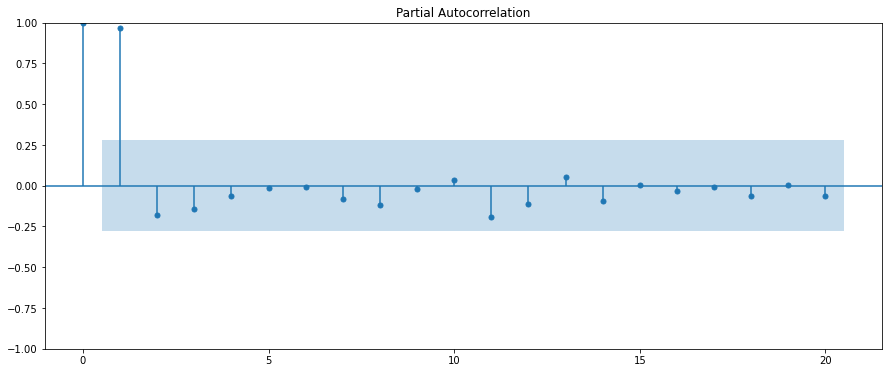

In [19]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
plt.show()

Podemos observar:
1. A função de autocorrelação (FAC) tem decaimento exponencial
2. A função de autocorrelação parcial (FACP) tem corte brusco após leg = 1

Ou seja, a série tem caracteristicas para utilizarmos um Modelo Auto regressivo (AR)

**Teste de estacionariedade**

In [20]:
def teste_df(serie):
    #H0: série não estacionária 
    dftest = adfuller(serie, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (5%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico 
        print('estacionária')
    else:
        print(df_output[0])
        print('não estacionária')

In [21]:
teste_df(df.values)

Test Statistic          0.424912
p-value                 0.982403
#Lags                   1.000000
Nº Observações         47.000000
Valor Crítico (1%)     -3.577848
Valor Crítico (5%)     -2.925338
Valor Crítico (10%)    -2.600774
dtype: float64
0.42491206216122157
não estacionária


In [22]:
df_diff = df.diff().dropna()

In [23]:
teste_df(df_diff.values)

Test Statistic         -3.405838
p-value                 0.010761
#Lags                   0.000000
Nº Observações         47.000000
Valor Crítico (1%)     -3.577848
Valor Crítico (5%)     -2.925338
Valor Crítico (10%)    -2.600774
dtype: float64
estacionária


In [24]:
df_diff_diff = df.diff().diff().dropna()

In [25]:
teste_df(df_diff_diff.values)

Test Statistic        -6.929925e+00
p-value                1.090738e-09
#Lags                  1.000000e+00
Nº Observações         4.500000e+01
Valor Crítico (1%)    -3.584829e+00
Valor Crítico (5%)    -2.928299e+00
Valor Crítico (10%)   -2.602344e+00
dtype: float64
estacionária


A série não é estacionária, porém quando aplicamos uma ou mais diferenciação, ela fica estacionária. Então, provavelmente utilizaremos a serie diferenciada para a aplicação dos modelos.

## Pré - processamento

Divisão da base de dados em uma base para treinamento e outra para teste

In [26]:
print('Quantidade de linhas a serem consideradas para cada parte')
print('Total:',df.shape[0])
print('Train:',round((df.shape[0])*0.75))
print('Test:',round((df.shape[0])*0.25))

Quantidade de linhas a serem consideradas para cada parte
Total: 49
Train: 37
Test: 12


In [27]:
corte = round(len(df) * 0.75)

train = df[:corte]
test = df[corte:]

In [28]:
if len(df) == len(train) + len(test):
    print("Separação OK")
    print('Train (qtd linhas):',train.shape[0])
    print('Test (qtd linhas):',test.shape[0])
else:
    print("Rever separação")

Separação OK
Train (qtd linhas): 37
Test (qtd linhas): 12


In [29]:
train.head()

,milhoes_tons
ano,
1965,5.033297
1966,6.147396
1967,7.738966
1968,8.504936
1969,9.277483


In [30]:
test

,milhoes_tons
ano,
2002,78.422303
2003,81.058067
2004,80.563939
2005,88.719863
2006,93.670600
2007,95.187961
2008,98.769011
2009,105.606944
2010,111.377764


## Metodologia Box-Jenkins

In [31]:
# Função para plotar o ACF E PACF
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

A série sem diferenciação já foi analisada anteriormente e conseguimos ver as caracteristicas da FAC e FACP bem como concluir que ela não é estacionária. Com isso, iremos aplicar a metodologia na série diferenciada.

### Série com 1 diferenciação

#### (1) Identificação:

##### Função de Autocorrelação e Função de Autocorrelação Parcial

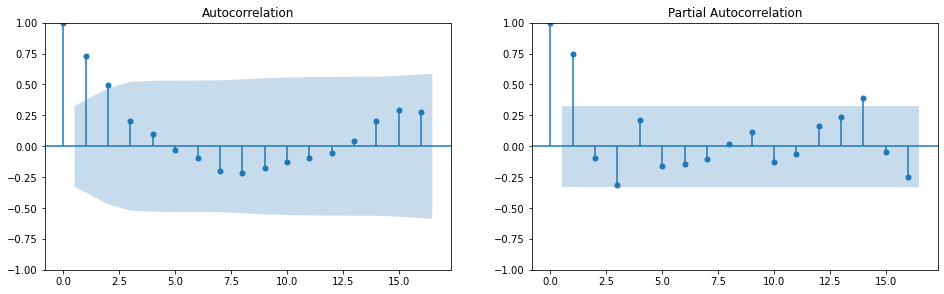

In [32]:
acf_pacf(train.milhoes_tons.diff().dropna(), 16)

##### Escolha do parâmetro (d):

Avaliando a quantidade de diferenciações

In [33]:
arima_d = 1

##### Escolha do parâmetro (p):

Avaliando FACP (Partial Autocorrelation)

In [34]:
arima_p = 1

##### Escolha do parâmetro (q):

Avaliando FAC (Autocorrelation)

In [35]:
arima_q_1 = 0
arima_q_2 = 1
arima_q_3 = 2

#### (2.1) Estimação:

In [36]:
#Considerando arima_q_1
model_arima_1 = ARIMA(train.milhoes_tons, order=(arima_p, arima_d, arima_q_1))
model_fit_1 = model_arima_1.fit()
print(model_fit_1.summary())

                               SARIMAX Results                                
Dep. Variable:           milhoes_tons   No. Observations:                   37
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -69.285
Date:                Mon, 03 Oct 2022   AIC                            142.571
Time:                        22:12:12   BIC                            145.738
Sample:                             0   HQIC                           143.676
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8248      0.075     10.982      0.000       0.678       0.972
sigma2         2.6635      0.519      5.130      0.000       1.646       3.681
Ljung-Box (L1) (Q):                   0.10   Jarque-

In [37]:
#Considerando arima_q_2
model_arima_2 = ARIMA(train.milhoes_tons, order=(arima_p, arima_d, arima_q_2))
model_fit_2 = model_arima_2.fit()
print(model_fit_2.summary())

                               SARIMAX Results                                
Dep. Variable:           milhoes_tons   No. Observations:                   37
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -69.285
Date:                Mon, 03 Oct 2022   AIC                            144.570
Time:                        22:12:13   BIC                            149.320
Sample:                             0   HQIC                           146.228
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8267      0.090      9.160      0.000       0.650       1.004
ma.L1         -0.0056      0.233     -0.024      0.981      -0.462       0.451
sigma2         2.6633      0.537      4.961      0.0

In [38]:
#Considerando arima_q_3
model_arima_3 = ARIMA(train.milhoes_tons, order=(arima_p, arima_d, arima_q_3))
model_fit_3 = model_arima_3.fit()
print(model_fit_3.summary())

                               SARIMAX Results                                
Dep. Variable:           milhoes_tons   No. Observations:                   37
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -67.986
Date:                Mon, 03 Oct 2022   AIC                            143.971
Time:                        22:12:13   BIC                            150.305
Sample:                             0   HQIC                           146.182
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6118      0.164      3.740      0.000       0.291       0.932
ma.L1          0.3036      0.242      1.255      0.209      -0.170       0.778
ma.L2          0.3911      0.198      1.979      0.0

Avaliando o parametro BIC, concluimos que o modelo com o arima_q_1 é o melhor para ser aplicado na serie com 1 diferenciação

#### (2.2) Avaliação/Diagnóstico:

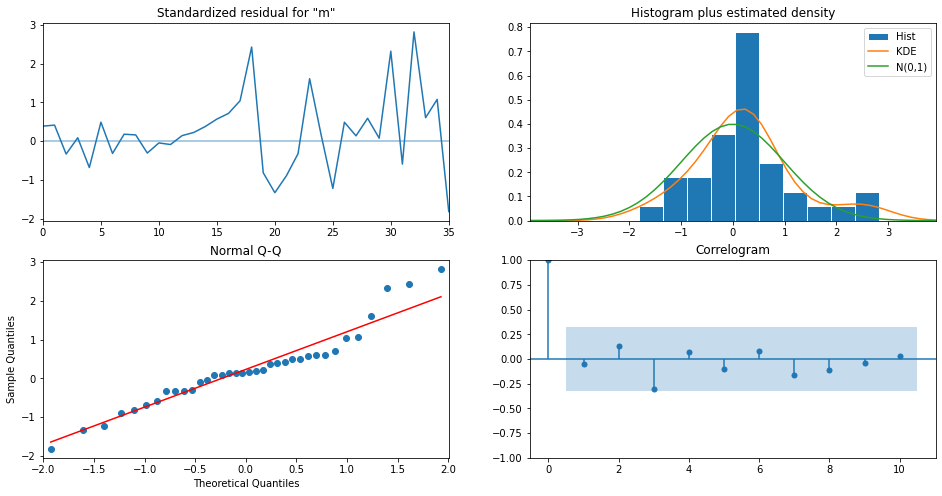

In [39]:
model_fit_1.plot_diagnostics(figsize=(16,8));

#### (3.1) Previsão:

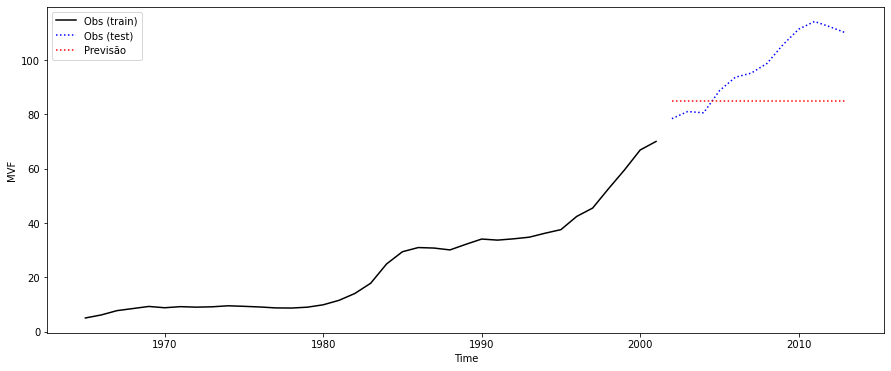

2002    84.826711
2003    84.826711
2004    84.826711
2005    84.826711
2006    84.826711
2007    84.826711
2008    84.826711
2009    84.826711
2010    84.826711
2011    84.826711
2012    84.826711
2013    84.826711
Name: predicted_mean, dtype: float64

In [40]:
#previsao = model_fit.predict(start=1965 + 37, end=1965 + 48)
previsao1 = model_fit_1.predict(start=(len(train)+1965), end=(len(train+test)+1965-1))

obs_train = plt.plot(train, color='black', label='Obs (train)')
obs_test = plt.plot(test, color='blue', label= 'Obs (test)', linestyle='dotted')#, 'bo') 
pred = plt.plot(previsao1, color='red', label='Previsão', linestyle='dotted')#, 'bo') 

plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("MVF")
plt.show()
previsao1

,previsao1,obs_test
2002,84.826711,78.422303
2003,84.826711,81.058067
2004,84.826711,80.563939
2005,84.826711,88.719863
2006,84.826711,93.670600
2007,84.826711,95.187961
2008,84.826711,98.769011
2009,84.826711,105.606944
2010,84.826711,111.377764
2011,84.826711,114.212252


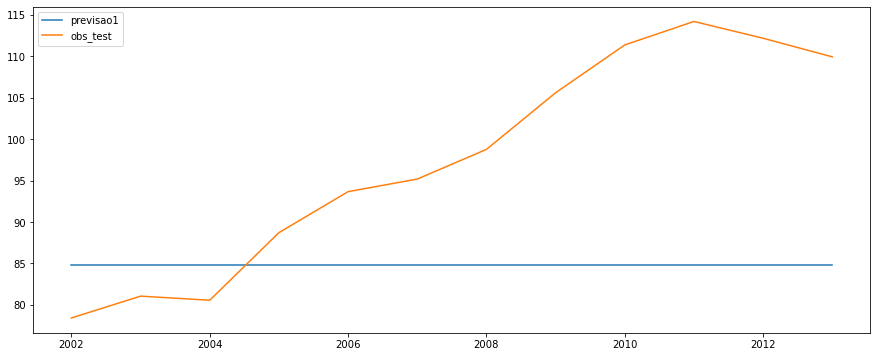

In [41]:
#pred = model_fit.predict(start=1965 + 37, end=1965 + 48)
#pred = model_fit.predict(start=(len(train)+1+1965), end=(len(train+test)+1965-1))
obs_test = test.milhoes_tons

previsao1_df = pd.DataFrame()
previsao1_df['previsao1'] = previsao1
previsao1_df['obs_test'] = obs_test

previsao1_df.plot()
previsao1_df

#### Erros Previsão vs Teste

In [42]:
#Criando uma tabela de erros para comparar todas as previsões que serão realizadas
erros_df = pd.DataFrame(columns = ['Previsão', 'MSE', 'MAPE'])
erros_df

,Previsão,MSE,MAPE


In [43]:
#MSE previsão 1
MSE_pred1 = round(mean_squared_error(previsao1_df['previsao1'], previsao1_df['obs_test']))

#MAPE previsão 1
MAPE_pred1 = round(mean_absolute_error(previsao1_df['previsao1'], previsao1_df['obs_test']))

#Acrescentando na tabela de erros
erros_df = erros_df.append({'Previsão': '1 diff', 'MSE': MSE_pred1, 'MAPE':MAPE_pred1}, ignore_index = True)
erros_df

,Previsão,MSE,MAPE
0,1 diff,321,15


#### (3.2) Previsão One step ahead 

In [44]:
history = [x for x in train.milhoes_tons]
predictions1 = list()

for t in test.index:
    model = ARIMA(history, order=(arima_p, arima_d, arima_q_1))
    model_fit = model.fit()
    output = model_fit.forecast(alpha=0.05)
    yhat = output[0]
    predictions1.append(yhat)
    obs = float(test.loc[t].values)
    history.append(obs)
    print('predicted=%f' % (yhat))

predicted=72.625850
predicted=85.693193
predicted=83.104369
predicted=80.188253
predicted=94.783444
predicted=97.262235
predicted=96.258605
predicted=101.322136
predicted=110.673353
predicted=115.702964
predicted=116.297787
predicted=110.735661


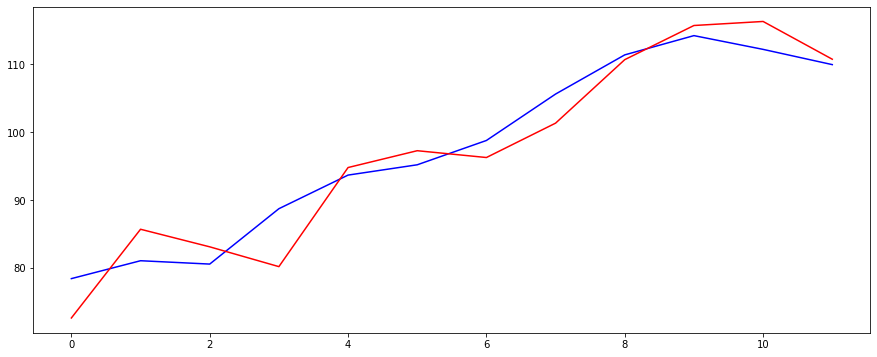

In [45]:
plt.plot(test.values, color='blue', label='Obs (train)')
plt.plot(predictions1, color='red',  label='Previsão')
plt.show()

In [46]:
obs_test = test.values

previsao1_osa_df = pd.DataFrame()
previsao1_osa_df['previsao1_osa'] = predictions1
previsao1_osa_df['obs_test'] = obs_test

previsao1_osa_df

,previsao1_osa,obs_test
0,72.625850,78.422303
1,85.693193,81.058067
2,83.104369,80.563939
3,80.188253,88.719863
4,94.783444,93.670600
5,97.262235,95.187961
6,96.258605,98.769011
7,101.322136,105.606944
8,110.673353,111.377764
9,115.702964,114.212252


#### Erros Previsão vs Teste

In [47]:
#MSE previsão 1 com one step ahead (osa)
MSE_pred1_osa = round(mean_squared_error(previsao1_osa_df['previsao1_osa'], previsao1_osa_df['obs_test']))

#MAPE previsão 1 com one step ahead (osa)
MAPE_pred1_osa = round(mean_absolute_error(previsao1_osa_df['previsao1_osa'], previsao1_osa_df['obs_test']))

#Acrescentando na tabela de erros
erros_df = erros_df.append({'Previsão': '1 diff OSA', 'MSE': MSE_pred1_osa, 'MAPE':MAPE_pred1_osa}, ignore_index = True)
erros_df

,Previsão,MSE,MAPE
0,1 diff,321,15
1,1 diff OSA,15,3


### Série com 2 diferenciações

#### (1) Identificação:

##### Função de Autocorrelação e Função de Autocorrelação Parcial

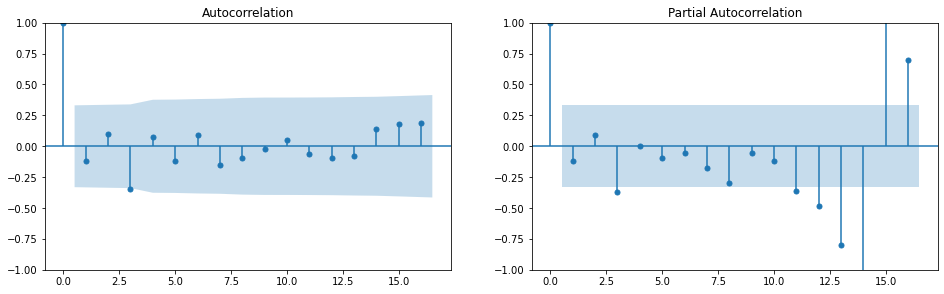

In [48]:
acf_pacf(train.milhoes_tons.diff().diff().dropna(), 16)

##### Escolha do parâmetro (d):

Avaliando a quantidade de diferenciações

In [49]:
arima_d = 2

##### Escolha do parâmetro (p):

Avaliando FACP (Partial Autocorrelation)

In [50]:
arima_p = 0

##### Escolha do parâmetro (q):

Avaliando FAC (Autocorrelation)

In [51]:
arima_q = 0

#### (2.1) Estimação:

In [52]:
model_arima2 = ARIMA(train.milhoes_tons, order=(arima_p, arima_d, arima_q))
model_fit2 = model_arima2.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:           milhoes_tons   No. Observations:                   37
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -68.502
Date:                Mon, 03 Oct 2022   AIC                            139.004
Time:                        22:12:35   BIC                            140.560
Sample:                             0   HQIC                           139.541
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.9345      0.602      4.873      0.000       1.754       4.115
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.47   Pr

O parametro BIC da serie com 2 diferenciações está melhor do que da série com apenas 1 diferenciação.

#### (2.2) Avaliação/Diagnóstico:

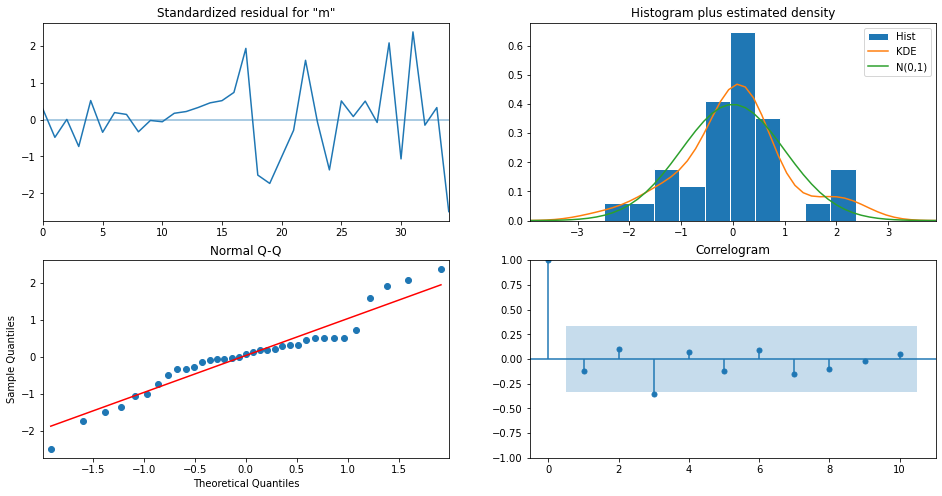

In [53]:
model_fit2.plot_diagnostics(figsize=(16,8));

#### (3.1) Previsão:

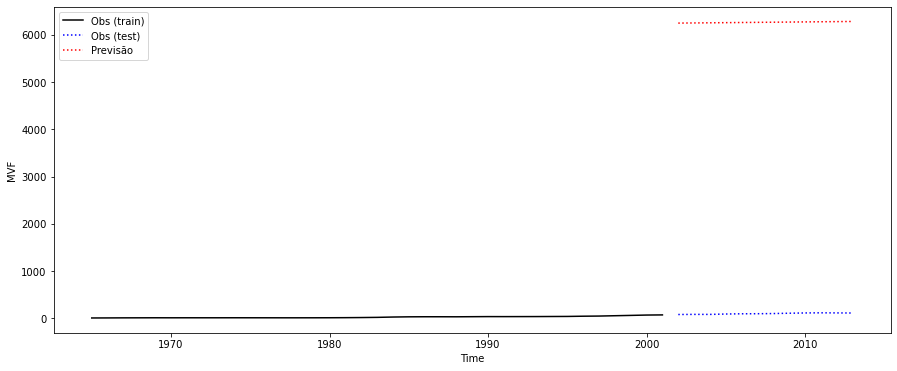

2002    6248.434205
2003    6251.576829
2004    6254.719454
2005    6257.862079
2006    6261.004704
2007    6264.147329
2008    6267.289953
2009    6270.432578
2010    6273.575203
2011    6276.717828
2012    6279.860452
2013    6283.003077
Name: predicted_mean, dtype: float64

In [54]:
#previsao = model_fit.predict(start=1965 + 37, end=1965 + 48)
previsao2 = model_fit2.predict(start=(len(train)+1965), end=(len(train+test)+1965-1))

obs_train = plt.plot(train, color='black', label='Obs (train)')
obs_test = plt.plot(test, color='blue', label= 'Obs (test)', linestyle='dotted')#, 'bo') 
pred = plt.plot(previsao2, color='red', label='Previsão', linestyle='dotted')#, 'bo') 

plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("MVF")
plt.show()
previsao2

,previsao2,obs_test
2002,6248.434205,78.422303
2003,6251.576829,81.058067
2004,6254.719454,80.563939
2005,6257.862079,88.719863
2006,6261.004704,93.670600
2007,6264.147329,95.187961
2008,6267.289953,98.769011
2009,6270.432578,105.606944
2010,6273.575203,111.377764
2011,6276.717828,114.212252


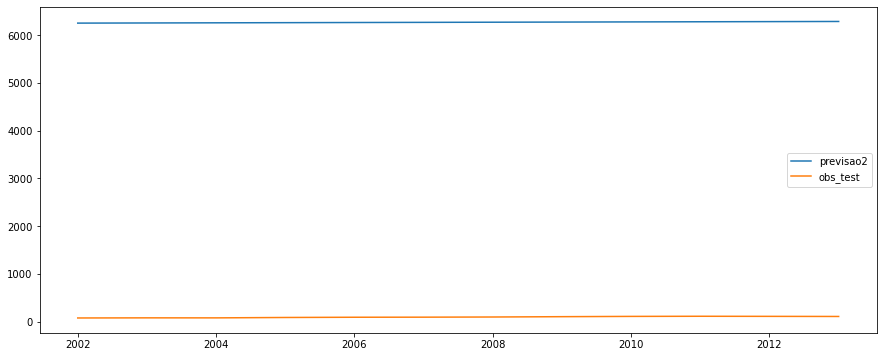

In [55]:
#pred = model_fit.predict(start=1965 + 37, end=1965 + 48)
obs_test = test.values

previsao2_df = pd.DataFrame()
previsao2_df['previsao2'] = previsao2
previsao2_df['obs_test'] = obs_test

previsao2_df.plot()
previsao2_df

#### Erros Previsão vs Teste

In [56]:
#MSE previsão 2
MSE_pred2 = round(mean_squared_error(previsao2_df['previsao2'], previsao2_df['obs_test']))

#MAPE previsão 2
MAPE_pred2 = round(mean_absolute_error(previsao2_df['previsao2'], previsao2_df['obs_test']))

#Acrescentando na tabela de erros
erros_df = erros_df.append({'Previsão': '2 diff', 'MSE': MSE_pred2, 'MAPE':MAPE_pred2}, ignore_index = True)
erros_df

,Previsão,MSE,MAPE
0,1 diff,321,15
1,1 diff OSA,15,3
2,2 diff,38047225,6168


#### (3.2) Previsão One step ahead

In [57]:
history = [x for x in train.milhoes_tons]
predictions2 = list()

for t in test.index:
    model = ARIMA(history, order=(arima_p, arima_d, arima_q))
    model_fit_2 = model.fit()
    output = model_fit_2.forecast(alpha=0.05)
    yhat = output[0]
    predictions2.append(yhat)
    obs = float(test.loc[t].values)
    history.append(obs)
    print('predicted=%f' % (yhat))

predicted=73.176496
predicted=86.810736
predicted=83.693831
predicted=80.069811
predicted=96.875786
predicted=98.621338
predicted=96.705322
predicted=102.350060
predicted=112.444877
predicted=117.148584
predicted=117.046741
predicted=110.161304


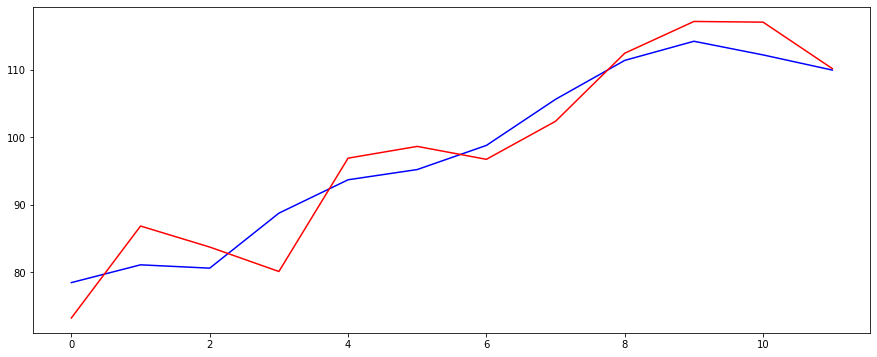

In [58]:
plt.plot(test.values, color='blue', label='Obs (train)')
plt.plot(predictions2, color='red',  label='Previsão')
plt.show()

In [59]:
obs_test = test.values

previsao2_osa_df = pd.DataFrame()
previsao2_osa_df['previsao2_osa'] = predictions2
previsao2_osa_df['obs_test'] = obs_test

previsao2_osa_df

,previsao2_osa,obs_test
0,73.176496,78.422303
1,86.810736,81.058067
2,83.693831,80.563939
3,80.069811,88.719863
4,96.875786,93.670600
5,98.621338,95.187961
6,96.705322,98.769011
7,102.350060,105.606944
8,112.444877,111.377764
9,117.148584,114.212252


#### Erros Previsão vs Teste

In [60]:
#MSE previsão 2 com one step ahead (osa)
MSE_pred2_osa = round(mean_squared_error(previsao2_osa_df['previsao2_osa'], previsao2_osa_df['obs_test']))

#MAPE previsão 2 com one step ahead (osa)
MAPE_pred2_osa = round(mean_absolute_error(previsao2_osa_df['previsao2_osa'], previsao2_osa_df['obs_test']))

#Acrescentando na tabela de erros
erros_df = erros_df.append({'Previsão': '2 diff OSA', 'MSE': MSE_pred2_osa, 'MAPE':MAPE_pred2_osa}, ignore_index = True)
erros_df

,Previsão,MSE,MAPE
0,1 diff,321,15
1,1 diff OSA,15,3
2,2 diff,38047225,6168
3,2 diff OSA,18,4


In [61]:
#Deletar linha acrescentada de forma errada no dataframe
#erros_df.drop([3], axis = 0, inplace = True)
#erros_df

### Utilizando o Auto Arima

#### (1) Identificação:

##### Escolha dos parametros p,d,q

In [62]:
model_auto_arima = auto_arima(df, max_p = 5 , max_q = 5, max_d = 2, 
                         max_P = 2, max_Q = 2, max_D = 2, m = 12, 
                         seasonal = False, trace = True, information_criterion = 'bic', 
                         stepwise = True)

Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=230.948, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=232.108, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=229.584, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=227.133, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.29 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.989 seconds


#### (2.1) Estimação:

In [63]:
model_autoarima = ARIMA(train.milhoes_tons, order = model_auto_arima.order)
arima_fit = model_autoarima.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           milhoes_tons   No. Observations:                   37
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -68.502
Date:                Mon, 03 Oct 2022   AIC                            139.004
Time:                        22:12:45   BIC                            140.560
Sample:                             0   HQIC                           139.541
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.9345      0.602      4.873      0.000       1.754       4.115
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.47   Pr

#### (2.2) Avaliação/Diagnóstico:

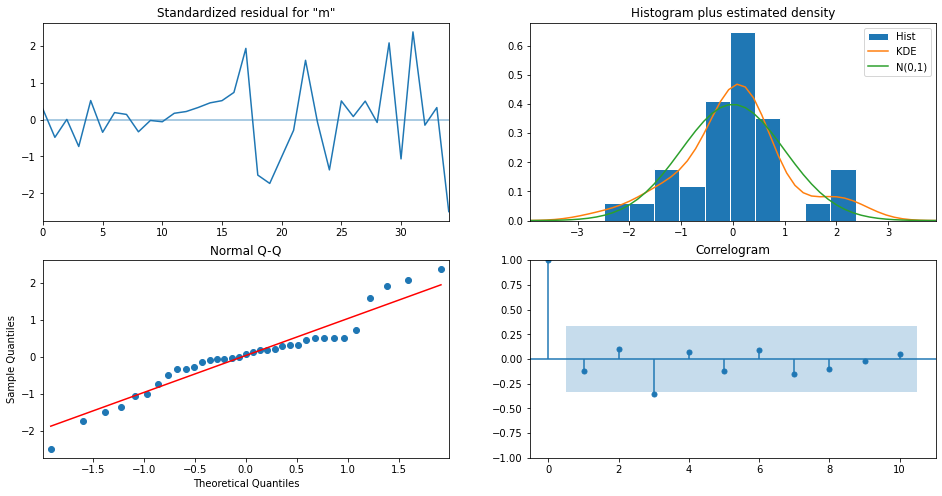

In [64]:
arima_fit.plot_diagnostics(figsize=(16,8));

#### (3) Previsão:

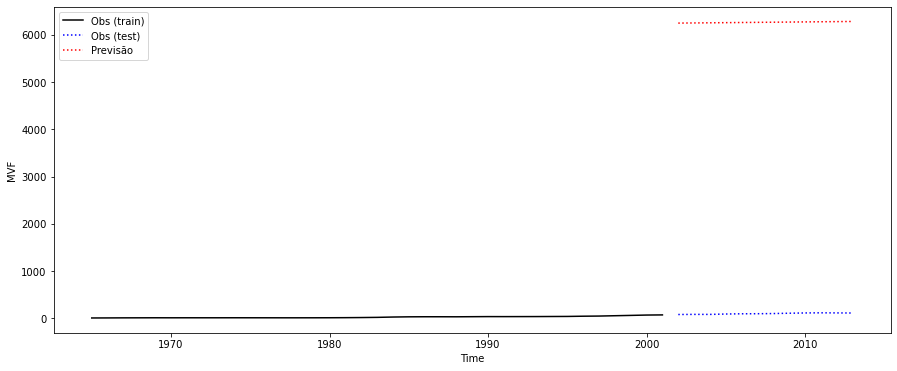

2002    6248.434205
2003    6251.576829
2004    6254.719454
2005    6257.862079
2006    6261.004704
2007    6264.147329
2008    6267.289953
2009    6270.432578
2010    6273.575203
2011    6276.717828
2012    6279.860452
2013    6283.003077
Name: predicted_mean, dtype: float64

In [65]:
#previsao = model_fit.predict(start=1965 + 37, end=1965 + 48)
prev_arima = arima_fit.predict(start=(len(train)+1965), end=(len(train+test)+1965-1))

obs_train = plt.plot(train, color='black', label='Obs (train)')
obs_test = plt.plot(test, color='blue', label= 'Obs (test)', linestyle='dotted')#, 'bo') 
pred = plt.plot(prev_arima, color='red', label='Previsão', linestyle='dotted')#, 'bo') 

plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("MVF")
plt.show()
prev_arima

,prev_arima,obs_test
2002,6248.434205,78.422303
2003,6251.576829,81.058067
2004,6254.719454,80.563939
2005,6257.862079,88.719863
2006,6261.004704,93.670600
2007,6264.147329,95.187961
2008,6267.289953,98.769011
2009,6270.432578,105.606944
2010,6273.575203,111.377764
2011,6276.717828,114.212252


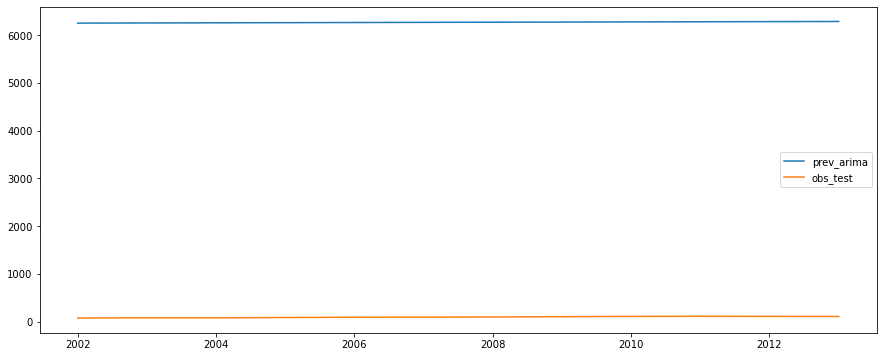

In [66]:
#pred = model_fit.predict(start=1965 + 37, end=1965 + 48)
obs_test = test.values

prev_arima_df = pd.DataFrame()
prev_arima_df['prev_arima'] = prev_arima
prev_arima_df['obs_test'] = obs_test

prev_arima_df.plot()
prev_arima_df

#### Erros Previsão vs Teste

In [67]:
#MSE previsão utilizando Auto arima
MSE_pred_arima = round(mean_squared_error(prev_arima_df['prev_arima'], prev_arima_df['obs_test']))

#MAPE previsão utilizando Auto arima
MAPE_pred_arima = round(mean_absolute_error(prev_arima_df['prev_arima'], prev_arima_df['obs_test']))

#Acrescentando na tabela de erros
erros_df = erros_df.append({'Previsão': 'Auto Arima', 'MSE': MSE_pred_arima, 'MAPE':MAPE_pred_arima}, ignore_index = True)
erros_df

,Previsão,MSE,MAPE
0,1 diff,321,15
1,1 diff OSA,15,3
2,2 diff,38047225,6168
3,2 diff OSA,18,4
4,Auto Arima,38047225,6168


#### (3.2) Previsão One step ahead

In [68]:
history = [x for x in train.milhoes_tons]
predictionsarima = list()

for t in test.index:
    model = ARIMA(history, order=(arima_p, arima_d, arima_q))
    model_fit_2 = model.fit()
    output = model_fit_2.forecast(alpha=0.05)
    yhat = output[0]
    predictionsarima.append(yhat)
    obs = float(test.loc[t].values)
    history.append(obs)
    print('predicted=%f' % (yhat))

predicted=73.176496
predicted=86.810736
predicted=83.693831
predicted=80.069811
predicted=96.875786
predicted=98.621338
predicted=96.705322
predicted=102.350060
predicted=112.444877
predicted=117.148584
predicted=117.046741
predicted=110.161304


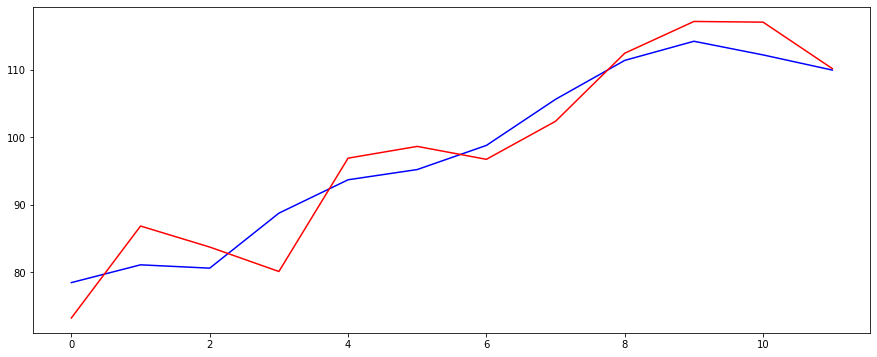

In [69]:
plt.plot(test.values, color='blue', label='Obs (train)')
plt.plot(predictionsarima, color='red',  label='Previsão')
plt.show()

In [70]:
obs_test = test.values

prev_arima_osa_df = pd.DataFrame()
prev_arima_osa_df['prev_arima_osa'] = predictionsarima
prev_arima_osa_df['obs_test'] = obs_test

prev_arima_osa_df

,prev_arima_osa,obs_test
0,73.176496,78.422303
1,86.810736,81.058067
2,83.693831,80.563939
3,80.069811,88.719863
4,96.875786,93.670600
5,98.621338,95.187961
6,96.705322,98.769011
7,102.350060,105.606944
8,112.444877,111.377764
9,117.148584,114.212252


#### Erros Previsão vs Teste

In [71]:
#MSE previsão 2 com one step ahead (osa)
MSE_pred_arima_osa = round(mean_squared_error(prev_arima_osa_df['prev_arima_osa'], prev_arima_osa_df['obs_test']))

#MAPE previsão 2 com one step ahead (osa)
MAPE_pred_arima_osa = round(mean_absolute_error(prev_arima_osa_df['prev_arima_osa'], prev_arima_osa_df['obs_test']))

#Acrescentando na tabela de erros
erros_df = erros_df.append({'Previsão': 'Auto Arima OSA', 'MSE': MSE_pred_arima_osa, 'MAPE':MAPE_pred_arima_osa}, ignore_index = True)
erros_df

,Previsão,MSE,MAPE
0,1 diff,321,15
1,1 diff OSA,15,3
2,2 diff,38047225,6168
3,2 diff OSA,18,4
4,Auto Arima,38047225,6168
5,Auto Arima OSA,18,4


### Outra aplicação Auto Arima

In [72]:
modelo_autoarima = pm.auto_arima(df, max_p=5 , max_q=5, max_d=2
                                 , max_P=2, max_Q=2, max_D=2, m=12
                                 , seasonal=True, trace=True, information_criterion='bic'
                                 , stepwise=True)
modelo_autoarima

Performing stepwise search to minimize bic
 ARIMA(2,2,2)(1,0,1)[12]             : BIC=241.642, Time=0.69 sec
 ARIMA(0,2,0)(0,0,0)[12]             : BIC=227.133, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : BIC=232.167, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[12]             : BIC=229.635, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[12]             : BIC=230.964, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[12]             : BIC=230.965, Time=0.07 sec
 ARIMA(0,2,0)(1,0,1)[12]             : BIC=234.814, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[12]             : BIC=228.317, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : BIC=225.787, Time=0.05 sec
 ARIMA(0,2,1)(1,0,0)[12]             : BIC=229.635, Time=0.06 sec
 ARIMA(0,2,1)(1,0,1)[12]             : BIC=233.481, Time=0.29 sec
 ARIMA(1,2,1)(0,0,0)[12]             : BIC=226.597, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[12]             : BIC=226.784, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[12]             : BIC=230.409, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[12] intercep

ARIMA(order=(0, 2, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

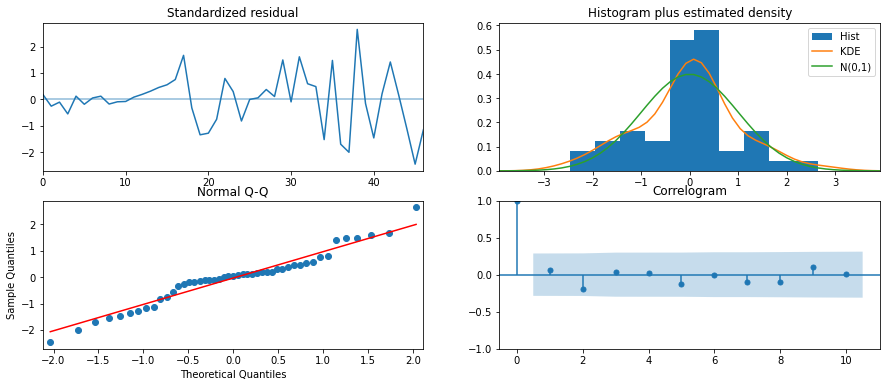

In [73]:
modelo_autoarima.plot_diagnostics();

In [74]:
model = sm.tsa.statespace.SARIMAX(train,order=(0, 2, 1),seasonal_order=(0,0,0,12))
results = model.fit()

#df['forecast'] = results.predict(start=(len(train)+1965), end=(len(train+test)+1965-1),dynamic=True)
#df[['milhoes_tons','forecast']].plot(figsize=(12,8))

In [75]:
#arima_model = ARIMA(train, order = model_auto_arima.order).fit()
#arima_result = arima_model.apply(test)
#arima_result.summary()

In [76]:
pred = results.predict(start=(len(train)+1965), end=(len(train+test)+1965-1)

#autoarima_df = pd.DataFrame(pred, index=test.index, columns=['pred'])
#autoarima_df = pd.concat([test, autoarima_df], axis=1)
#autoarima_df.plot();

obs_test = test.values

autoarima_df = pd.DataFrame()
autoarima_df['pred'] = pred
autoarima_df['obs_test'] = obs_test

autoarima_df.plot()
autoarima_df

SyntaxError: invalid syntax (341787733.py, line 9)

### Conclusão

## Machine Learning

## LIXO

In [ ]:
#adf = adfuller(df)
#print(f'p-valor: {round(adf[1],2)}')

In [ ]:
#df.info()

In [ ]:
#Definindo as variáveis preditoras (X) e a target (y). Ainda não está pegando o bairro.
#X = df.iloc[:,1]
#y = df.iloc[:,2]

In [ ]:
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train.shape
#y_train.shape

In [ ]:
#df['Ano'].value_counts()

In [ ]:
#df['Year'] = df['Year'].astype(str)

In [ ]:
#df['Year'] = df['Year'].str[0:4]
#df

In [ ]:
#df['Year'] = df['Year'].astype(int)

In [ ]:
#df.info()

In [ ]:
#df.set_index('Year',inplace=True)
#df.index=df.index.astype(int)

### Eliminação da Tendência por Diferenciação

In [ ]:
df_1ordem = df.diff()
plt.plot(df_1ordem, label="Diff - 1ª Ordem")
plt.legend(loc='best')
plt.show()

In [ ]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.diff().rolling(window = 12).mean()
rolstd12 = df.diff().rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df['Milimitros'].diff(), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [ ]:
plot_acf(df_1ordem, lags=50)
plot_pacf(df_1ordem, lags=50)
plt.show()

In [ ]:
df_decomp_1ordem = tsa.seasonal_decompose(df_1ordem, period=12)
df_decomp_1ordem.plot();

In [ ]:
#df_logged = df["ncasos"].apply(lambda x : np.log(x))

#ax1 = plt.subplot()
#df_logged.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);

In [ ]:
df_logg = np.log(df)
plt.plot(df_logg, label = "Log - 1ª Ordem")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rolmean12 = np.log(df).rolling(window = 12).mean()
rolstd12 = np.log(df).rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [ ]:
plot_acf(df_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_logg.dropna(), lags=12, alpha=0.5);

In [ ]:
df_diff_logg = df_logg.diff()
plt.plot(df_diff_logg, label="Diff - Log - 1ª Ordem")
plt.legend(loc='best')
plt.show()

In [ ]:
rolmean12 = df_diff_logg.rolling(window = 12).mean()
rolstd12 = df_diff_logg.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df_diff_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [ ]:
#df_logg2 = np.log(df_logg)
#plt.plot(df_logg, label = "Log - 2ª Ordem")
#plt.legend(loc = 'best')
#plt.show()

In [ ]:
#rolmean12 = np.log(df_logg).rolling(window = 12).mean()
#rolstd12 = np.log(df_logg).rolling(window = 12).std()
#plt.figure(figsize=(7, 5))
#actual = plt.plot(np.log(df_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
#rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
#std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
#plt.legend(loc='best')
#plt.xlabel("Time")
#plt.ylabel("Target")
#plt.show()

In [ ]:
plot_acf(df_diff_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_diff_logg.dropna(), lags=12, alpha=0.5);